In [0]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from google.colab import files
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import Imputer

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/PayelGanguly96/Loan-Prediction/master/train_loanPrediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# data cleaning and preprocessing

In [0]:
data['Dependents'].fillna(value='0',inplace=True)
data['Dependents']=data.Dependents.map({'3+':5,'0':0,'1':1,'2':2})

data.Gender.fillna(value='Male',inplace=True)
data.Gender=data.Gender.map({'Male':0,'Female':1})

data.Married.fillna(value='Yes',inplace=True)
data.Married=data.Married.map({'Yes':1,'No':0})

data.Loan_Status=data.Loan_Status.map({'Y':1,'N':0})

data.Self_Employed.fillna(value='No',inplace=True)

data.Loan_Amount_Term.fillna(value=360.0,inplace=True)

data.Credit_History.fillna(value=1.0,inplace=True)

data.Property_Area=data.Property_Area.map({'Urban':1,'Rural':0})

data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

data.Property_Area.fillna(value=1.,inplace=True)

In [44]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,1.0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


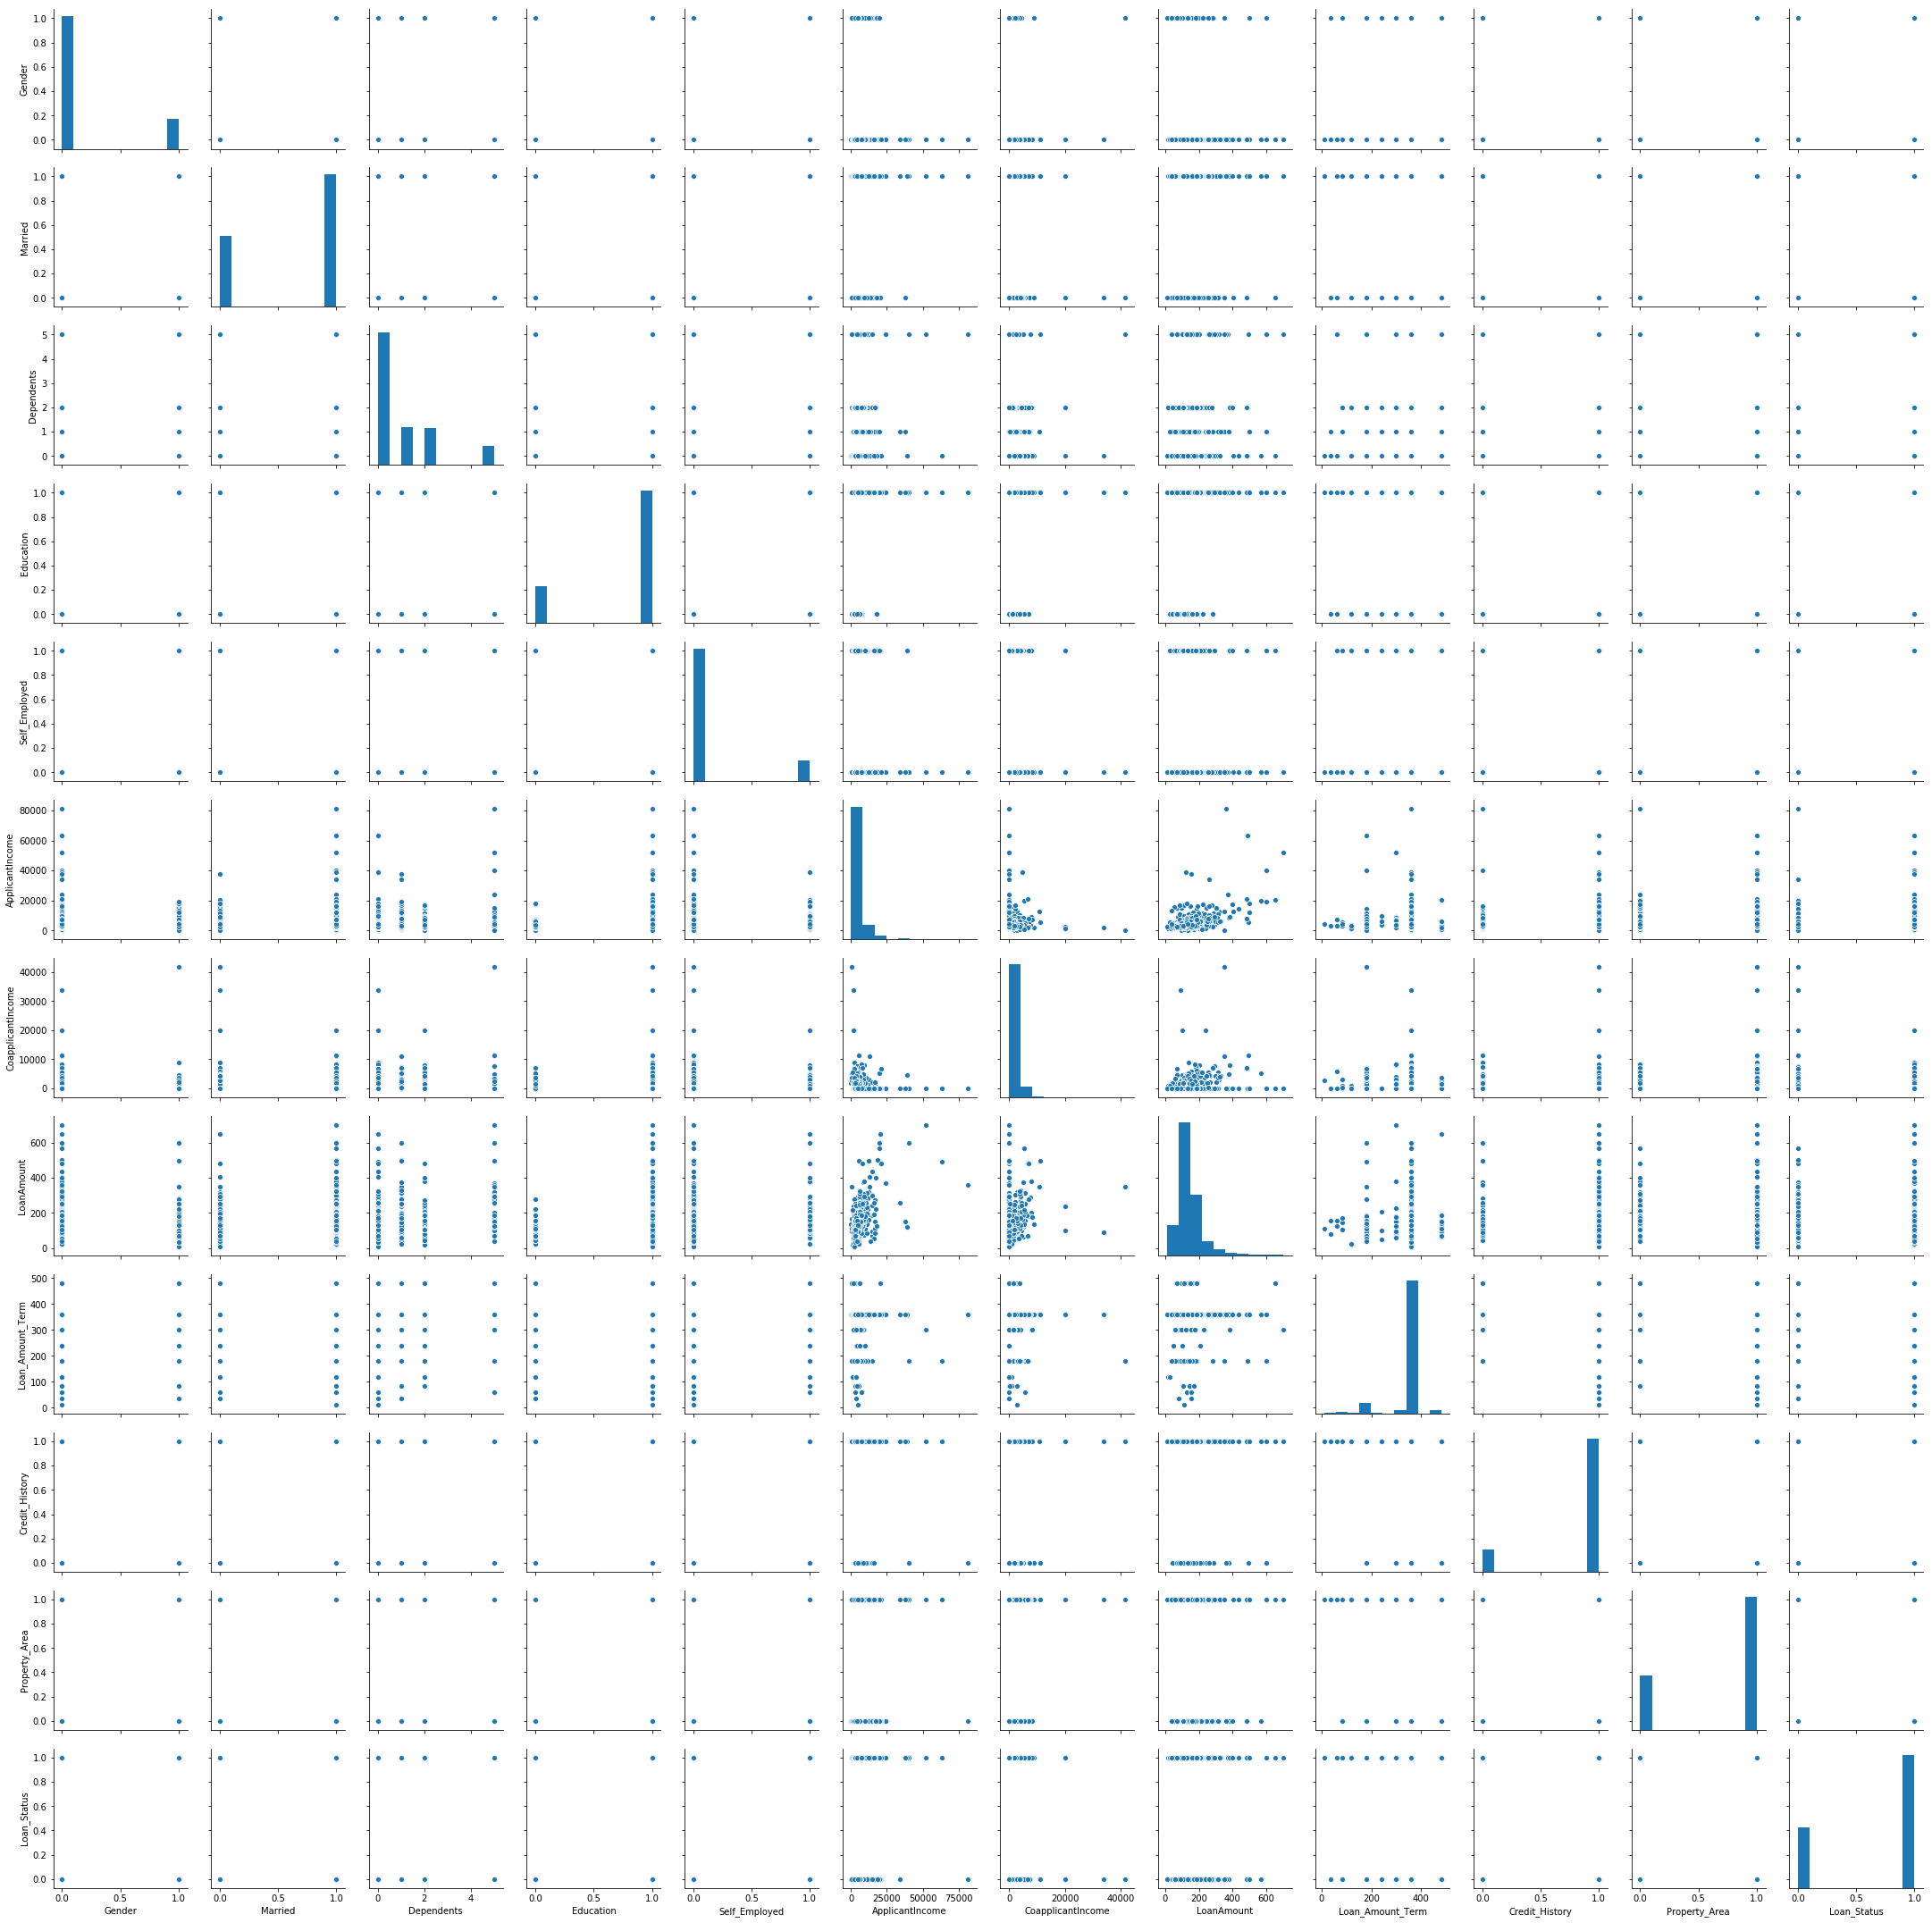

In [45]:
sns.pairplot(data)

In [46]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.158124,0.045364,0.000525,-0.058809,-0.082912,-0.109520,0.074030,-0.009170,0.080283,-0.017987
Married,-0.364569,1.000000,0.285075,-0.012304,0.004489,0.051708,0.075948,0.149743,-0.100912,0.010938,0.006805,0.091478
Dependents,-0.158124,0.285075,1.000000,-0.060276,0.041064,0.142928,0.037238,0.176410,-0.102426,-0.051336,-0.015024,-0.002926
Education,0.045364,-0.012304,-0.060276,1.000000,0.010383,0.140760,0.062290,0.171133,0.073928,0.073658,0.077520,0.085884
Self_Employed,0.000525,0.004489,0.041064,0.010383,1.000000,0.127180,-0.016100,0.117421,-0.033739,-0.001550,-0.022065,-0.003700
ApplicantIncome,-0.058809,0.051708,0.142928,0.140760,0.127180,1.000000,-0.116605,0.570909,-0.046531,-0.018615,-0.015829,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.037238,0.062290,-0.016100,-0.116605,1.000000,0.188619,-0.059383,0.011134,-0.005329,-0.059187
LoanAmount,-0.109520,0.149743,0.176410,0.171133,0.117421,0.570909,0.188619,1.000000,0.036981,-0.001463,-0.043942,-0.037318
Loan_Amount_Term,0.074030,-0.100912,-0.102426,0.073928,-0.033739,-0.046531,-0.059383,0.036981,1.000000,-0.004705,-0.034321,-0.022549
Credit_History,-0.009170,0.010938,-0.051336,0.073658,-0.001550,-0.018615,0.011134,-0.001463,-0.004705,1.000000,0.020906,0.540556


In [0]:
x=data.drop(labels=['Loan_Status','Loan_ID'],axis=1)
y=data.Loan_Status

In [48]:
imputer = Imputer()
x.LoanAmount=imputer.fit_transform(x[['LoanAmount']])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.27,random_state=42)

In [0]:
sc_X=StandardScaler()
xtr=sc_X.fit_transform(xtr)
xte= sc_X.fit_transform(xte)

In [0]:
pca = PCA(n_components=None)
xtr=pca.fit_transform(xtr)
xte=pca.fit_transform(xte)

In [100]:
classifier_logi = LogisticRegression()
classifier_logi.fit(xtr,ytr)
pre=classifier_logi.predict(xte)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
accuracy = cross_val_score(estimator=classifier_logi, X=xtr, y=ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
accuracy.mean()

0.8213870246085012

In [105]:
accuracy.std()

0.013161361117387155

In [106]:
classifier_ran = RandomForestClassifier()
classifier_ran.fit(xtr,ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
accuracy = cross_val_score(estimator=classifier_ran, X=xtr, y=ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [108]:
accuracy.mean()

0.7588814317673377

In [109]:
accuracy.std()

0.028828417909826782

In [110]:
knn=KNeighborsClassifier()
knn.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [112]:
acc=cross_val_score(estimator=knn,X=xtr,y=ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [113]:
acc.mean()

0.7901565995525727

In [114]:
acc.std()

0.012983103470735493